In [99]:
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow import keras

In [100]:
np.random.seed(42)
tf.random.set_seed(42)

In [101]:
# 데이터셋 불러오기

base = 'C:/Users/LJH/Documents/코드스테이츠/section4/project/train'

ghost_dir = os.path.join(base, 'ghost')
encanto_dir = os.path.join(base, 'encanto')
mother_dir = os.path.join(base, 'mother')
sing_dir = os.path.join(base, 'sing')

In [102]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
        base,  
        target_size=(126, 300),
        batch_size=1364,
        class_mode='binary',
        subset='training')

test_generator = datagen.flow_from_directory(
        base,  
        target_size=(126, 300),
        batch_size=2139,
        class_mode='binary',
        subset='validation')

Found 2139 images belonging to 4 classes.
Found 533 images belonging to 4 classes.


In [103]:
train_generator.class_indices

{'encanto': 0, 'ghost': 1, 'mother': 2, 'sing': 3}

In [104]:
# 라벨 분리

X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)

In [105]:
# 모델 생성

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(126, 300, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(126, 300, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(126, 300, 3)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [106]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [107]:
# 모델 학습
from tensorflow.python.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/100
43/43 [==============================] - 27s 619ms/step - loss: 1.3240 - accuracy: 0.4106 - val_loss: 0.8411 - val_accuracy: 0.6360
Epoch 2/100
43/43 [==============================] - 26s 617ms/step - loss: 0.7492 - accuracy: 0.6972 - val_loss: 0.6870 - val_accuracy: 0.7129
Epoch 3/100
43/43 [==============================] - 27s 618ms/step - loss: 0.5243 - accuracy: 0.8050 - val_loss: 0.6676 - val_accuracy: 0.7486
Epoch 4/100
43/43 [==============================] - 26s 616ms/step - loss: 0.3803 - accuracy: 0.8519 - val_loss: 0.4947 - val_accuracy: 0.8086
Epoch 5/100
43/43 [==============================] - 27s 619ms/step - loss: 0.2022 - accuracy: 0.9318 - val_loss: 0.4836 - val_accuracy: 0.8274
Epoch 6/100
43/43 [==============================] - 27s 618ms/step - loss: 0.1391 - accuracy: 0.9516 - val_loss: 0.3909 - val_accuracy: 0.8705
Epoch 7/100
43/43 [==============================] - 27s 633ms/step - loss: 0.1129 - accuracy: 0.9582 - val_loss: 0.7009 - val_accuracy:

In [108]:
model.evaluate(X_test, y_test)

17/17 [==============================] - 2s 117ms/step - loss: 0.9780 - accuracy: 0.8705


[0.9780300855636597, 0.8705440759658813]

In [109]:
import matplotlib.pyplot as plt
import numpy as np

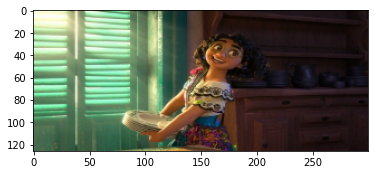

In [110]:
# 스크린샷으로 성능 확인

encanto1 = plt.imread('C:/Users/LJH/Documents/코드스테이츠/section4/project/cap/AKR20211119095800005_03_i_P4.jpg')
plt.imshow(encanto1)

In [111]:
encanto1_scale = encanto1/255
encanto1_re = encanto1_scale.reshape(1,126,300,3)

In [112]:
y_prob1 = model.predict(encanto1_re, verbose=0)
predicted1 = y_prob1.argmax(axis=-1)
predicted1

array([0], dtype=int64)

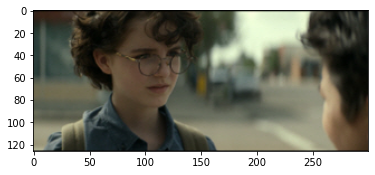

In [113]:
ghost1 = plt.imread('C:/Users/LJH/Documents/코드스테이츠/section4/project/cap/고스 (1).mkv_001477309.jpg')
plt.imshow(ghost1)

In [114]:
ghost1_scale = ghost1/255
ghost1_re = ghost1_scale.reshape(1,126,300,3)

In [115]:
y_prob2 = model.predict(ghost1_re, verbose=0)
predicted2 = y_prob2.argmax(axis=-1)
predicted2

array([1], dtype=int64)

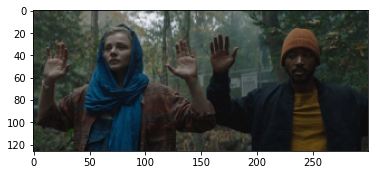

In [116]:
mother1 = plt.imread('C:/Users/LJH/Documents/코드스테이츠/section4/project/cap/5d0c22066389ccc248239be88fc16cd7.jpg')
plt.imshow(mother1)

In [117]:
mother1_scale = mother1/255
mother1_re = mother1_scale.reshape(1,126,300,3)

In [118]:
y_prob3 = model.predict(mother1_re, verbose=0)
predicted3 = y_prob3.argmax(axis=-1)
predicted3

array([2], dtype=int64)

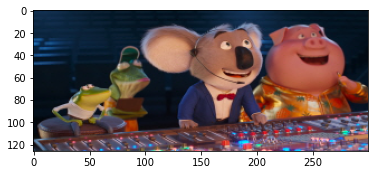

In [119]:
sing1 = plt.imread('C:/Users/LJH/Documents/코드스테이츠/section4/project/cap/08c3d11e1d57e4c0f4500b3961aa8d829bb89067.jpg')
plt.imshow(sing1)

In [120]:
sing1_scale = sing1/255
sing1_re = sing1_scale.reshape(1,126,300,3)

In [121]:
y_prob4 = model.predict(sing1_re, verbose=0)
predicted4 = y_prob4.argmax(axis=-1)
predicted4

array([3], dtype=int64)